### This is the final part of this loan default prediction study. In this part of study, we will try a few models, tune hyperparameters on each of them, and select the one with the best performance as our final model for this case. We will also print the result.

## Content:
### 1. Data Preparation 
### 2. K nearest neighbors
#### 2.1 Grid Search Cross Validation for k value
#### 2.2 K Nearest Neighbors with best k
### 3. Decision Tree
#### 3.1 Try entrooy and gini as criteria
#### 3.2 Decision Tree with gini 
### 4. Logistic Regression
#### 4.1 Try different C value
#### 4.2 Logistic Regression and results
### 5. Random Forest Classifier
#### 5.1 Grid Search cross validation for n_estimators
#### 5.2 Try random forest and see the results
### 6. Random Forest on dataset with more points on default loans

## 1. Data Preparation

First let's import all necessary modules.

In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [348]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree, metrics

In [349]:
# read data.
data_lc = pd.read_csv('..\Data\lending_club_data_balanced.csv')

In [350]:
data_lc.head()

,last_fico_range_low,recoveries,last_pymnt_amnt,int_rate,term,loan_status,debt_settlement_flag,fico_range_high,total_rec_late_fee
0,580.0,1618.90,471.70,19.48,60 months,0,N,669.0,0.00
1,0.0,368.37,146.16,14.85,36 months,0,N,729.0,0.00
2,625.0,0.00,565.09,12.88,36 months,0,N,679.0,161.46
3,0.0,0.00,701.01,24.24,60 months,0,N,664.0,0.00
4,600.0,0.00,581.58,13.99,60 months,0,N,734.0,0.00


In [351]:
data_lc.shape

(616298, 9)

This dataset has totally 9 variables (columns), including one target variable ('loan_status') and 8 predictor variables.

In [352]:
# create target variable array.
y = data_lc['loan_status']

In [353]:
# create predictor variables array.
X = data_lc.drop(columns = 'loan_status')

In [354]:
# encode predictor variables.
X = pd.get_dummies(X, drop_first = True)

In [355]:
X.head()

,last_fico_range_low,recoveries,last_pymnt_amnt,int_rate,fico_range_high,total_rec_late_fee,term_ 60 months,debt_settlement_flag_Y
0,580.0,1618.90,471.70,19.48,669.0,0.00,1,0
1,0.0,368.37,146.16,14.85,729.0,0.00,0,0
2,625.0,0.00,565.09,12.88,679.0,161.46,0,0
3,0.0,0.00,701.01,24.24,664.0,0.00,1,0
4,600.0,0.00,581.58,13.99,734.0,0.00,1,0


In [356]:
# split the data into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101)

Let's try a few models.

### 2. K nearest neighbors
#### 2.1 Grid Search Cross Validation for k value

Let's first use grid search cross validation to get the best K value (n_neighbors).

In [357]:
param_grid = {'n_neighbors': np.arange(3,12,2)}

In [358]:
knn = KNeighborsClassifier()

In [359]:
knn_cv = GridSearchCV(knn, param_grid, cv=5)

In [360]:
knn_cv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11])})

In [361]:
knn_cv.best_params_

{'n_neighbors': 11}

In [362]:
knn_cv.best_score_

0.9588186097142242

Result shows that the best K value is 11. So let's use this value to see the KNN model prediction performance.

#### 2.2 K Nearest Neighbors with best k

In [388]:
knn_best = KNeighborsClassifier(n_neighbors=11)

In [389]:
knn_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [390]:
y_pred_knn = knn_best.predict(X_test)

In [391]:
score_1 = knn_best.score(X_test, y_test)

In [392]:
score_1

0.9587019308778193

In [393]:
confusion_matrix(y_test, y_pred_knn)

array([[55537,  3143],
       [ 3220, 92175]], dtype=int64)

In [394]:
print(classification_report(y_test, y_pred_knn, digits = 3))

              precision    recall  f1-score   support

           0      0.945     0.946     0.946     58680
           1      0.967     0.966     0.967     95395

    accuracy                          0.959    154075
   macro avg      0.956     0.956     0.956    154075
weighted avg      0.959     0.959     0.959    154075



In [395]:
classification_report_1 = classification_report(y_test, y_pred_knn, digits = 3, output_dict=True)

This is our first model. We will use its result to compare other models. 

### 3. DecisionTree

Let's then have a look on the decision tree model. For this model there are two main criteria (for measuring the quality of a split), which are entropy and gini. Let's try both and see their each performance.

#### 3.1 Try entrooy and gini as criteria

In [371]:
# first try on the entropy model.
entr_model = tree.DecisionTreeClassifier(criterion='entropy', random_state=1234)

# Call fit() on entr_model
entr_model.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred_entr = entr_model.predict(X_test)

In [372]:
entr_model.score(X_test, y_test)

0.9565925685542755

In [373]:
print(confusion_matrix(y_test, y_pred_entr))

[[55414  3266]
 [ 3422 91973]]


In [374]:
# then try the gini model
gini_model = tree.DecisionTreeClassifier(criterion='gini', random_state=1234)

# Call fit() on entr_model
gini_model.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred_gini = gini_model.predict(X_test)

In [375]:
gini_model.score(X_test, y_test)

0.9562096381632322

In [376]:
print(confusion_matrix(y_test, y_pred_gini))

[[55428  3252]
 [ 3495 91900]]


By comparing the two confusion matrix, we can see that their performance is very close. Since the main purpose of this study is to detect potential default loan (loan_status = 0), We will select the one which make less misclassification on data points that loan_status = 0. The entropy model made 3266 misclassifcation, and the gini model made 3252. So we can say that the gini model is (slightly) better than the entropy model. 

#### 3.2 Decision Tree with gini 

In [377]:
score_2 = gini_model.score(X_test, y_test)

In [378]:
classification_report_2 = classification_report(y_test, y_pred_gini, digits=3, output_dict=True)

In [379]:
print('KNN score:', round(score_1, 3), '  Decision Tree score:', round(score_2,3))

KNN score: 0.958   Decision Tree score: 0.956


In [380]:
plt.rc('font', size=20)

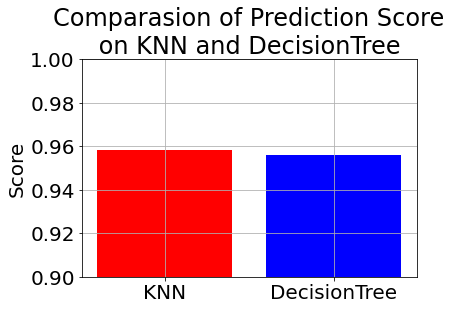

In [381]:
# plot the two scores in one plot 
plt.bar(['KNN','DecisionTree'], [score_1, score_2], color=['r', 'b'])
plt.ylim(0.9, 1.0)
plt.grid(True)
plt.ylabel('Score')
plt.title('Comparasion of Prediction Score\n on KNN and DecisionTree ')
plt.show()

Now let's create one dataframe to show the f1 score under different model for loan_status = 0 and = 1 respectively. We will then plot them in one chart.

In [382]:
report_1 = pd.DataFrame(classification_report_1)

In [383]:
report_2 = pd.DataFrame(classification_report_2)

In [384]:
f1_score_value = [report_1.loc['f1-score','0'], report_1.loc['f1-score','1'], 
                  report_2.loc['f1-score','0'], report_2.loc['f1-score','1']]

In [385]:
f1_score_df =pd.DataFrame({'loan_status':[0,1,0,1], 'Model':['KNN', 'KNN', 'DecisionTree', 'DecisionTree'], 
                           'f1_score':f1_score_value})

In [386]:
f1_score_df

,loan_status,Model,f1_score
0,0,KNN,0.945143
1,1,KNN,0.966231
2,0,DecisionTree,0.942629
3,1,DecisionTree,0.964591


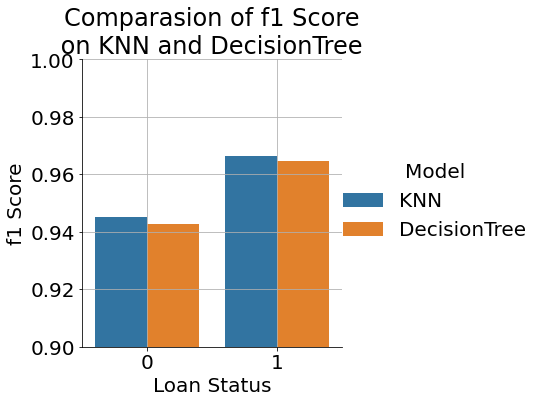

In [396]:
# Plot f1 score under different models and different loan status value.
sns.catplot(x='loan_status', y='f1_score', data=f1_score_df, hue='Model', kind='bar')
plt.ylim(0.9, 1.0)
plt.xlabel('Loan Status')
plt.ylabel('f1 Score')
plt.title('Comparasion of f1 Score\n on KNN and DecisionTree ')
plt.grid(True)
plt.show()

From the result shown above, we can see that the Decision Tree model is not as good as the KNN model. So we will still use KNN to compare with other models later.

### 4. Logistic Regression

Now let's try the logistic regression. 

#### 4.1 Try different C value

In [397]:
Cs = [ 0.01, 0.1, 1, 10, 100]
score_lr = []
for c in Cs:
    clf = LogisticRegression(C=c)
    clf.fit(X_train, y_train)
    score_lr.append(clf.score(X_test, y_test))
    print(c, clf.score(X_test, y_test))

C:\Users\cheng\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.01 0.954132727567743


C:\Users\cheng\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.1 0.9540937854940775
1 0.9541197468765211


C:\Users\cheng\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


10 0.9532695116014928
100 0.9545675807236735


C:\Users\cheng\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [398]:
print(score_lr)

[0.954132727567743, 0.9540937854940775, 0.9541197468765211, 0.9532695116014928, 0.9545675807236735]


Result shows that the score is not sensitive to C value. So we will just use the default value.

#### 4.2 Logistic Regression and results

Let's try the logistic regression and see the results.

In [399]:
logreg = LogisticRegression()

In [400]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [401]:
y_pred_lr = logreg.predict(X_test)

In [402]:
score_3 = logreg.score(X_test, y_test)

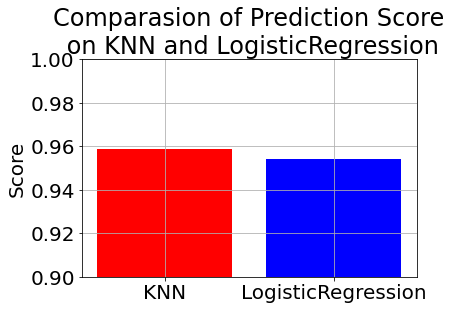

In [403]:
plt.bar(['KNN','LogisticRegression'], [score_1, score_3], color=['r', 'b'])
plt.ylim(0.9, 1.0)
plt.grid(True)
plt.ylabel('Score')
plt.title('Comparasion of Prediction Score\n on KNN and LogisticRegression')
plt.show()

In [404]:
classification_report_3 = classification_report(y_test, y_pred_lr, digits=3, output_dict=True)

In [405]:
report_3 = pd.DataFrame(classification_report_3)

In [406]:
f1_score_value = [report_1.loc['f1-score','0'], report_1.loc['f1-score','1'], 
                  report_3.loc['f1-score','0'], report_3.loc['f1-score','1']]

In [407]:
f1_score_df =pd.DataFrame({'loan_status':[0,1,0,1], 'Model':['KNN', 'KNN', 'LogisticRegression', 'LogisticRegression'], 
                           'f1_score':f1_score_value})

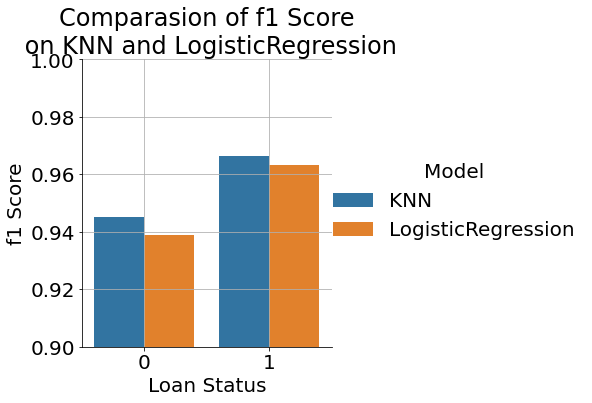

In [408]:
sns.catplot(x='loan_status', y='f1_score', data=f1_score_df, hue='Model', kind='bar')
plt.ylim(0.9, 1.0)
plt.xlabel('Loan Status')
plt.ylabel('f1 Score')
plt.title('Comparasion of f1 Score\n on KNN and LogisticRegression')
plt.grid(True)
plt.show()

The logistic regression model runs fast, but the result is not as good as KNN. So the logistic regression model is not selected as our final. 

### 5. Random Forest Classifier

Next let's try the random forest classifier. For this model the hyperparameter is the n_estimators. Let's tune this hyperparameter first.

#### 5.1 Grid Search cross validation for n_estimators

In [409]:
# I have already change the n_estimators range and run a few times to narrow down the range. This is the last time run.
param_grid = {'n_estimators':np.arange(62,67)}
rfModel = RandomForestClassifier()
rf_cv= GridSearchCV(rfModel,param_grid,cv=5)
rf_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([62, 63, 64, 65, 66])})

In [410]:
rf_cv.best_params_

{'n_estimators': 63}

In [411]:
rf_cv.best_score_

0.9671219291011255

The best n_estimators is 63. So let's use this value and calculate the score and the classification report. 

#### 5.2 Try random forest and see the results

In [448]:
model_rf = RandomForestClassifier(n_estimators = 63)

In [449]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=63)

In [450]:
y_pred_rf = model_rf.predict(X_test)

In [451]:
score_4 = model_rf.score(X_test, y_test)

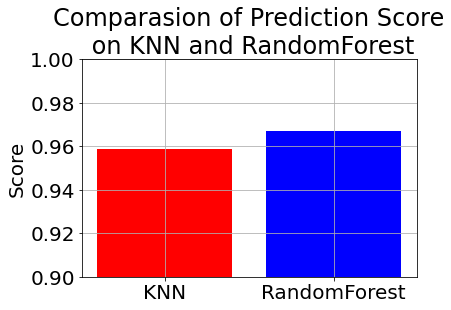

In [452]:
plt.bar(['KNN','RandomForest'], [score_1, score_4], color=['r', 'b'])
plt.ylim(0.9, 1.0)
plt.grid(True)
plt.ylabel('Score')
plt.title('Comparasion of Prediction Score\n on KNN and RandomForest')
plt.show()

In [453]:
print(classification_report(y_test, y_pred_rf, digits=3))

              precision    recall  f1-score   support

           0      0.957     0.957     0.957     58680
           1      0.973     0.973     0.973     95395

    accuracy                          0.967    154075
   macro avg      0.965     0.965     0.965    154075
weighted avg      0.967     0.967     0.967    154075



In [454]:
classification_report_4 = classification_report(y_test, y_pred_rf, digits=3, output_dict=True)

In [455]:
report_4 = pd.DataFrame(classification_report_4)

In [456]:
f1_score_value = [report_1.loc['f1-score','0'], report_1.loc['f1-score','1'], 
                  report_4.loc['f1-score','0'], report_4.loc['f1-score','1']]

In [457]:
f1_score_df =pd.DataFrame({'loan_status':[0,1,0,1], 'Model':['KNN', 'KNN', 'RandomForest', 'RandomForest'], 
                           'f1_score':f1_score_value})

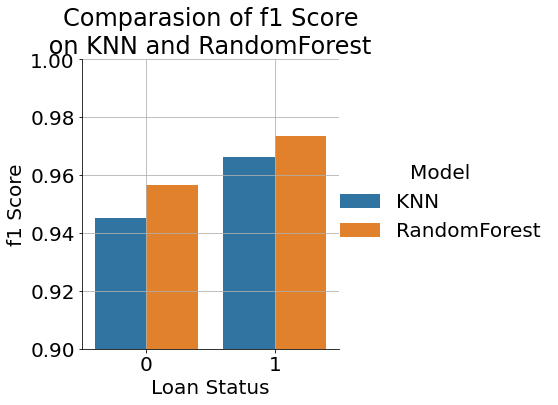

In [458]:
sns.catplot(x='loan_status', y='f1_score', data=f1_score_df, hue='Model', kind='bar')
plt.ylim(0.9, 1.0)
plt.xlabel('Loan Status')
plt.ylabel('f1 Score')
plt.title('Comparasion of f1 Score\n on KNN and RandomForest ')
plt.grid(True)
plt.show()

In [459]:
print(confusion_matrix(y_test, y_pred_rf))

[[56130  2550]
 [ 2531 92864]]


For comparason, let's place the confusion matrix for KNN model.

In [460]:
print(confusion_matrix(y_test, y_pred_knn))

[[55537  3143]
 [ 3220 92175]]


We can see that comparing to the KNN model, the random forest has big improvement in predicting both classes in our target variable.

This could be the final part of this analysis. But when we look at all the f1 values, we realize that the prediction on fully paid loans is always more sucessful than the defaulted loans. 

Let's think of the question: Do we want a model which predict default loans more sucessful, or we want a model which predict the fully paid loans more successful? Well, if a loan is defaulted, the lender will have bigger trouble: they will have to deal with the situation that they have to request payment again and again from the borrower; on the other hand, if the model fails to predict a fully paid loan, the lender will lose the business opportunity. But that seems small problem, as they still have the money to lend to next person. So as decision from this disuss: we want a model which predict default loans more successful.

Therefore we wants to give a try to change the model prediction result. Let's reduce the data point of fully paid loans, and try the random forest again. See if this will help to increase the f1 score for default loans.

### 6. Random Forest on dataset with more points on default loans

Let's create a new dataset by dropping half of data points with loan_status = 1.

In [461]:
data_1 = data_lc[data_lc['loan_status']==0]
data_2 = data_lc[data_lc['loan_status']==1].sample(frac=0.5)

In [462]:
data_1.shape, data_2.shape

((234900, 9), (190699, 9))

We can see that now we have more data points on loan_status = 0 than = 1. Let's have a look on the performance of random forest with this data.

In [463]:
data_balanced = pd.concat([data_1, data_2], ignore_index=True)

In [464]:
# create target variable array.
y_new = data_balanced['loan_status']

In [465]:
# create predictor variables array.
X_new = data_balanced.drop(columns = 'loan_status')

In [466]:
# encode predictor variables.
X_new = pd.get_dummies(X_new, drop_first = True)

In [467]:
X_new.head()

,last_fico_range_low,recoveries,last_pymnt_amnt,int_rate,fico_range_high,total_rec_late_fee,term_ 60 months,debt_settlement_flag_Y
0,580.0,1618.90,471.70,19.48,669.0,0.00,1,0
1,0.0,368.37,146.16,14.85,729.0,0.00,0,0
2,625.0,0.00,565.09,12.88,679.0,161.46,0,0
3,0.0,0.00,701.01,24.24,664.0,0.00,1,0
4,600.0,0.00,581.58,13.99,734.0,0.00,1,0


In [468]:
# split the data into train and test.
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, random_state = 101)

In [469]:
model_rf_new = RandomForestClassifier(n_estimators = 65)

In [470]:
model_rf_new.fit(X_train_new, y_train_new)

RandomForestClassifier(n_estimators=65)

In [471]:
y_pred_rf_new = model_rf_new.predict(X_test_new)

In [472]:
score_5 = model_rf_new.score(X_test_new, y_test_new)

In [473]:
score_4, score_5

(0.9670225539509979, 0.967359022556391)

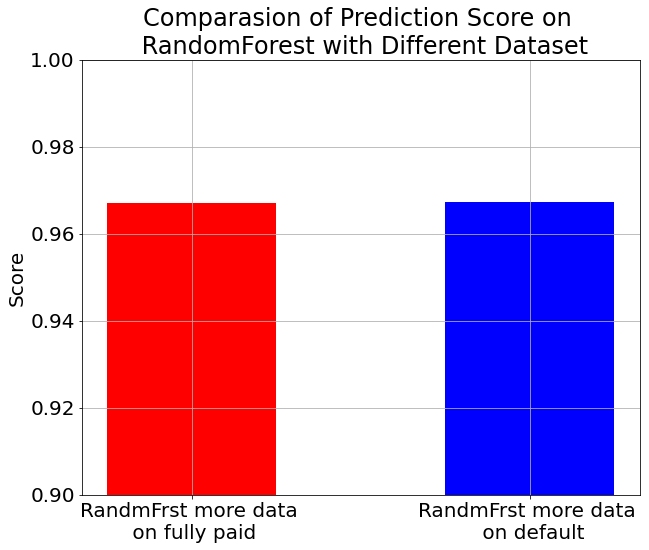

In [474]:
plt.figure(figsize=(10,8))
plt.bar(['RandmFrst more data \n on fully paid','RandmFrst more data \n on default'], [score_4, score_5], 
        color=['r', 'b'], width=0.5)
plt.ylim(0.9, 1.0)
plt.grid(True)
plt.ylabel('Score')
plt.title('Comparasion of Prediction Score on \n RandomForest with Different Dataset')
plt.show()

Result shows that there is almost no improvment in the prediction score in the dataset with more on default. Now let's see the classification report.

In [475]:
print(classification_report(y_test_new, y_pred_rf_new, digits=3))

              precision    recall  f1-score   support

           0      0.968     0.973     0.970     58543
           1      0.966     0.961     0.964     47857

    accuracy                          0.967    106400
   macro avg      0.967     0.967     0.967    106400
weighted avg      0.967     0.967     0.967    106400



In [476]:
classification_report_5 = classification_report(y_test_new, y_pred_rf_new, digits=3, output_dict=True)

In [477]:
report_5 = pd.DataFrame(classification_report_5)

In [478]:
f1_score_value = [report_4.loc['f1-score','0'], report_4.loc['f1-score','1'], 
                  report_5.loc['f1-score','0'], report_5.loc['f1-score','1']]

In [479]:
f1_score_df =pd.DataFrame({'loan_status':[0,1,0,1], 'RandomForest':['more data on fully paid', 'more data on fully paid', 
                'more data on default', 'more data on default'], 'f1_score':f1_score_value})

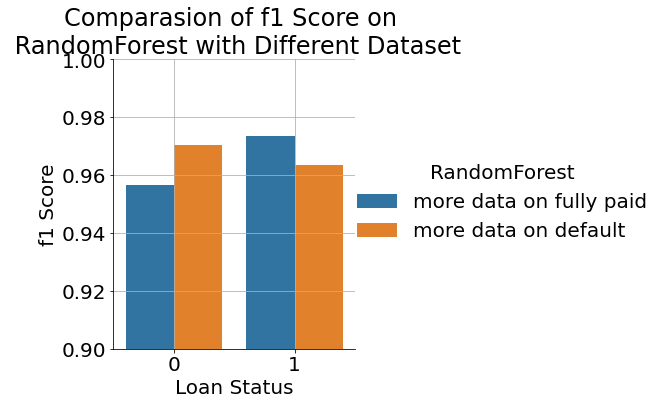

In [480]:
sns.catplot(x='loan_status', y='f1_score', data=f1_score_df, hue='RandomForest', kind='bar')
plt.ylim(0.9, 1.0)
plt.xlabel('Loan Status')
plt.ylabel('f1 Score')
plt.title('Comparasion of f1 Score on \n RandomForest with Different Dataset')
plt.grid(True)
plt.show()

In [481]:
print(confusion_matrix(y_test_new, y_pred_rf_new))

[[56940  1603]
 [ 1870 45987]]


In [482]:
print(confusion_matrix(y_test, y_pred_rf))

[[56130  2550]
 [ 2531 92864]]


Conclusion: The result is very interesting: We do see a good improvement in predicting loan_status = 0, and a drop in predicting loan_status = 1. That is exactly what as we wish to see. So which dataset to use really depends on the interest of the lender. If they want a model to be more successful in predicting the default loans, we will surely use the random forest model with a dataset with more points on defaulted loans. Otherwise we will use the model with more points on fully paid loans. We can also imagine, that according to the interest of the lender, if they want a higher prediction score on default loan, they can remove more rows on fully paid loan from the training data.